# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
# YOUR CODE HERE
data = "iris.tsv"
df = pd.read_csv(data, sep='\t')

df.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,target
28,5.7,3.8,1.7,0.3,0
124,6.0,3.0,4.8,1.8,2
45,6.3,3.3,6.0,2.5,2
142,6.8,2.8,4.8,1.4,1
85,4.6,3.4,1.4,0.3,0
127,5.1,2.5,3.0,1.1,1
93,6.4,2.8,5.6,2.2,2
7,5.5,2.5,4.0,1.3,1
68,5.8,2.6,4.0,1.2,1
87,4.7,3.2,1.3,0.2,0


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [5]:
# YOUR CODE HERE
df.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target'], dtype='object')

YOUR ANSWERS HERE

sepal-length: the length of the sepal on the outside part of the plant  
sepal-width: the width of the sepal on the outside part of the plant  
petal-length: the length of the petal of the plant  
petal-width: the width of the petal of the plant  
target: the species of the plant, 0 = setosa, 1 = versicolor, 2 = virginica  

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

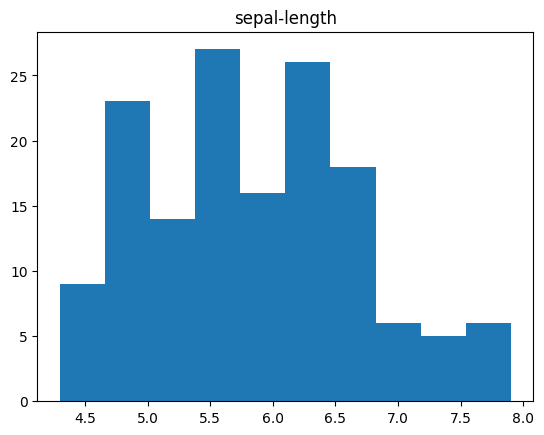

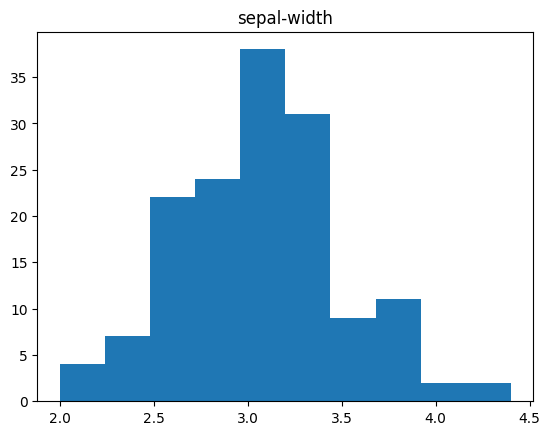

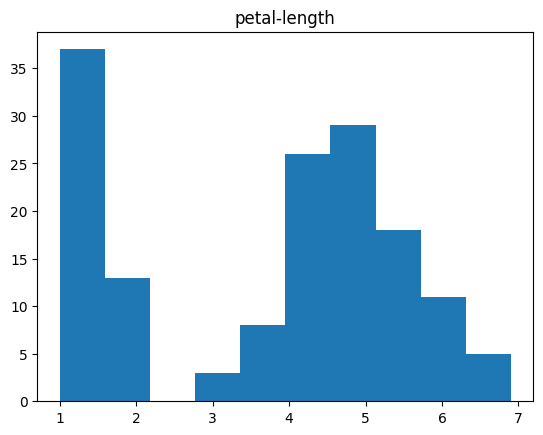

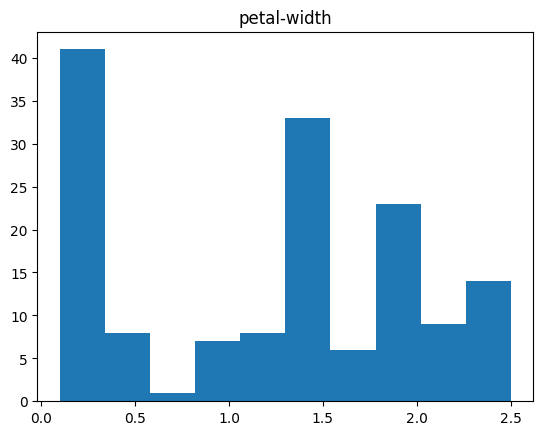

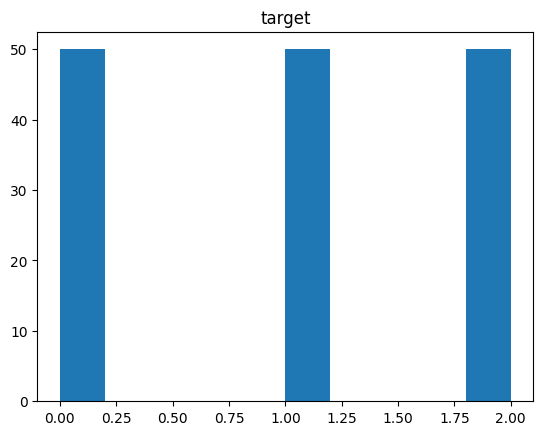

In [6]:
# YOUR CODE HERE
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

YOUR ANSWERS HERE

speal-length: distribution is roughly normal with a slight right skew.  
sepal-width: distribution is roughly normal with a slight right skew.  
petal-length: distribution is bimodal with two distinct peaks at 1 and 5.  
petal-width: distribution is also bimodal with two distinct peaks at 0 and 1.5.  
target: distribution is categorical with three distinct classes (0, 1, 2) representing different species of iris flowers.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

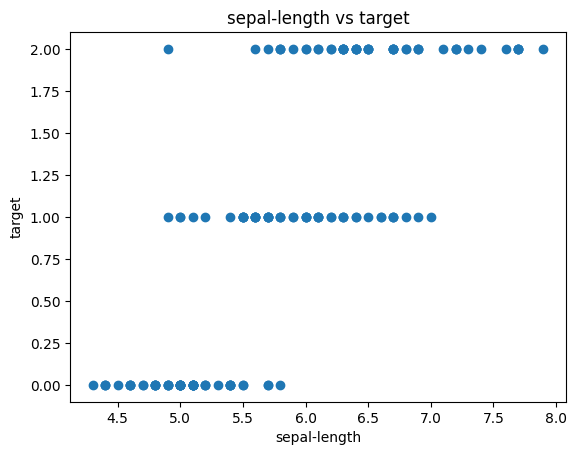

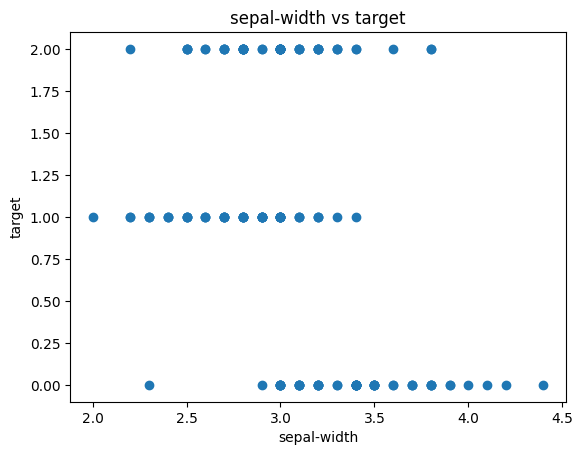

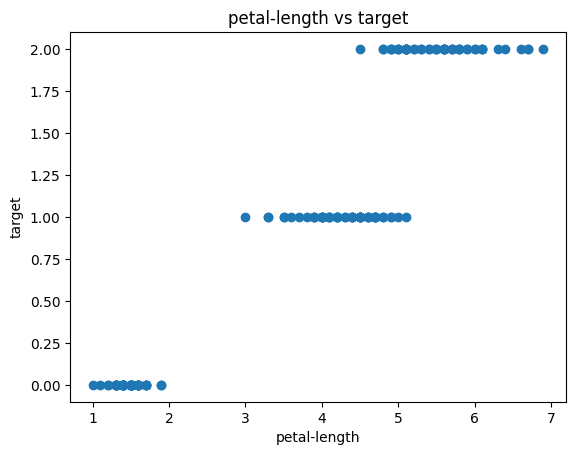

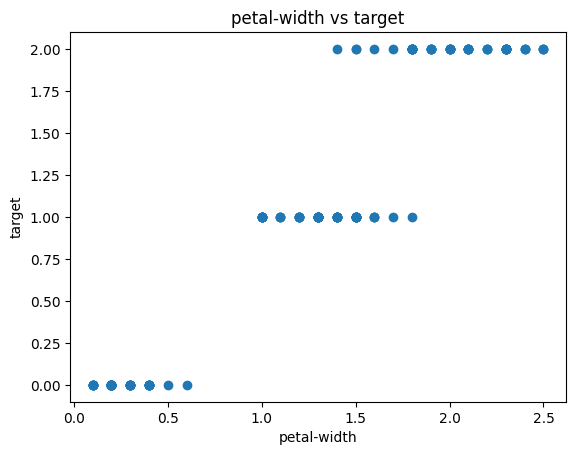

In [7]:
# YOUR CODE HERE
input_cols = df.columns[:-1]
output_cols = df.columns[-1:]

for col in input_cols:
    plt.scatter(df[col], df[output_cols[0]])
    plt.title(f"{col} vs {output_cols[0]}")
    plt.xlabel(col)
    plt.ylabel(output_cols[0])
    plt.show()

YOUR ANSWERS HERE

sepal-length & target: dependent  
sepal-width & target: dependent  
petal-length & target: dependent  
petal-width & target: dependent  

All are dependent because each graph shows that there are distinct groups at target = 0, 1, and 2. For some, the values at each target are more spread out like with sepal-length and sepal-width, but there is still a clear difference between target 0, 1, and 2 when comparing against the input column.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean squared error: 0.02666666666666667


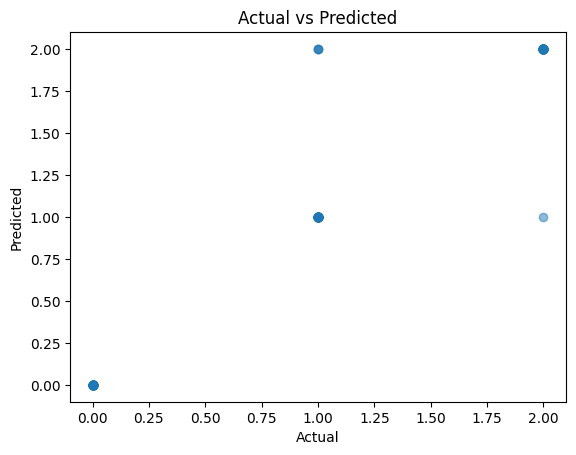

In [59]:
# YOUR CODE HERE
model = sklearn.linear_model.LogisticRegression()
x = df[input_cols]
y = df[output_cols[0]]
model.fit(x, y)
predictions = model.predict(x)
actual = y.values

mse = np.mean((predictions - actual) ** 2)
print("Mean squared error:", mse)

plt.scatter(actual, predictions, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

YOUR ANSWERS HERE

Mean squared error: 0.02666666666666667

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [57]:
# YOUR CODE HERE
for col in input_cols:
    x = df[[col]].values
    model = sklearn.linear_model.LogisticRegression()
    model.fit(x, y)
    predictions = model.predict(x)
    actual = y.values
    mse = np.mean((predictions - actual) ** 2)
    print(f"Mean squared error for {col}:", mse)

Mean squared error for sepal-length: 0.2733333333333333
Mean squared error for sepal-width: 0.9533333333333334
Mean squared error for petal-length: 0.04666666666666667
Mean squared error for petal-width: 0.04


YOUR ANSWERS HERE

The column which individually created the best model is petal-width with a MSE of 0.04.  
This is slightly larger than the total MSE of 0.02666666666666667 meaning that it does not account for all of the variance in the data, however, it does a very good job on it's own.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

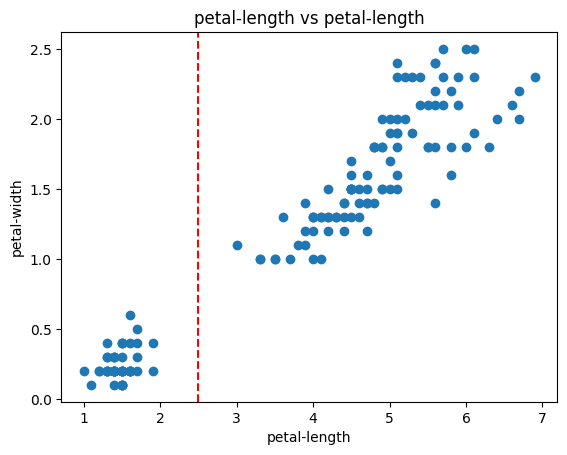

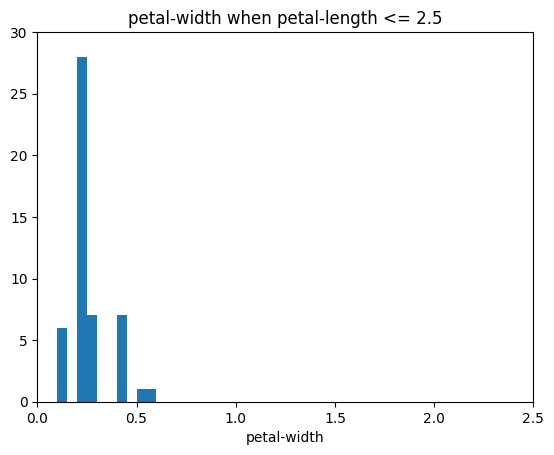

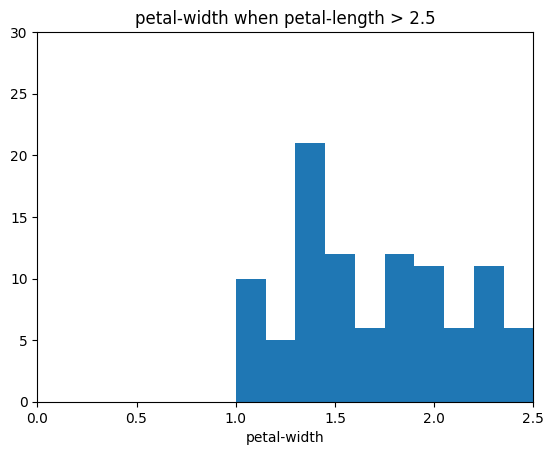

In [63]:
# YOUR CODE HERE
c1 = "petal-length"
c2 = "petal-width"

plt.scatter(df[c1], df[c2])
plt.axvline(x=2.5, color = "red", linestyle = "--")
plt.title(f"{c1} vs {c1}")
plt.xlabel(c1)
plt.ylabel(c2)
plt.show()

temp1 = df[df[c1] <= 2.5]
plt.hist(temp1[c2])
plt.title(f"{c2} when {c1} <= 2.5")
plt.xlabel(c2)
plt.xlim((0,2.5))
plt.ylim((0,30))
plt.show()

temp2 = df[df[c1] > 2.5]
plt.hist(temp2[c2])
plt.title(f"{c2} when {c1} > 2.5")
plt.xlabel(c2)
plt.xlim((0,2.5))
plt.ylim((0,30))
plt.show()

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [43]:
# YOUR CODE HERE
norm = df[input_cols] / df[input_cols].std()

pca = PCA()
pca.fit(norm)
df_components = pd.DataFrame(pca.components_, columns=input_cols)
df_components

,sepal-length,sepal-width,petal-length,petal-width
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416
2,0.721017,-0.242033,-0.140892,-0.633801
3,-0.261996,0.124135,0.801154,-0.523546


In [44]:
pca.explained_variance_

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

In [45]:
pca_var = pca.explained_variance_ratio_[:2].sum()
print("Proportion of variance explained by first two components:", pca_var)

Proportion of variance explained by first two components: 0.9580097536148264


          PC1        PC2
0    5.822121   9.675641
1    5.207638   7.582248
2    5.125836   8.976265
3    6.387085  11.842318
4    5.816396   9.847624
..        ...        ...
145  2.000124   9.789828
146  1.894221  10.807575
147  1.794544   9.585847
148  1.577043   9.966611
149  1.912633   9.559223

[150 rows x 2 columns]


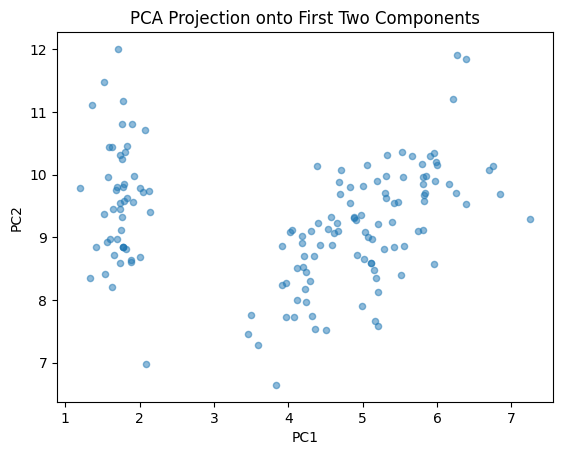

In [46]:
proj = norm @ df_components.iloc[:2].T
proj.columns = ["PC1", "PC2"]
print(proj)

proj.plot.scatter(x="PC1", y="PC2", alpha=0.5)
plt.title("PCA Projection onto First Two Components")
plt.show()

Mean squared error: 0.0714672509163902


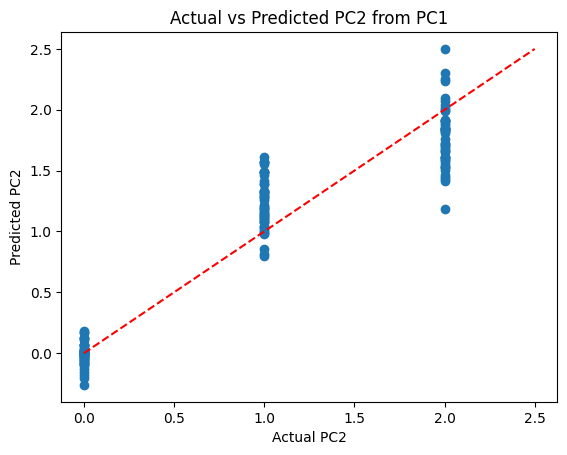

In [53]:
model = sklearn.linear_model.LinearRegression()
x = proj
y = df["target"]

model.fit(x, y)

predictions = model.predict(x)
actual = y.values

mse = np.mean((predictions - actual) ** 2)
print("Mean squared error:", mse)

plt.scatter(actual, predictions)
plt.plot(np.linspace(0,2.5,10), np.linspace(0,2.5,10), color='red', linestyle='--')
plt.xlabel("Actual PC2")
plt.ylabel("Predicted PC2")
plt.title("Actual vs Predicted PC2 from PC1")
plt.show()

YOUR ANSWERS HERE

Proportion of variance explained by first two components: 0.9580097536148264.  
Mean squared error: 0.0714672509163902.  
This MSE is actually larger than the previously calculated MSE of 0.02666666666666667. This means that the addition of the other two columns, sepal-length and sepal width, creates a better model.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [23]:
# YOUR CODE HERE
track = 0
highest = []
for c1 in input_cols:
    for c2 in input_cols:
        if c1 == c2: continue
        else:
            cor = df[c1].corr(df[c2])
            if math.fabs(cor) > track:
                track = math.fabs(cor)
                highest = [c1, c2, cor]

print("Highest correlation is between", highest[0], "and", highest[1], "with a correlation of", highest[2])

Highest correlation is between petal-length and petal-width with a correlation of 0.9627570970509658


YOUR ANSWERS HERE

Highest correlation is between petal-length and petal-width with a correlation of 0.9627570970509658.  
This is reflected by the principal components because they both contribute strongly to the first and last component. In the first component they both have large positive contributions while in the last component, they have strong contributions but length is positive while width is negative.  

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

    sepal-length  sepal-width  petal-length  petal-width  target
83           5.0          2.0           3.5          1.0       1
IQR: 0.5
Lower bound for outliers: 2.05


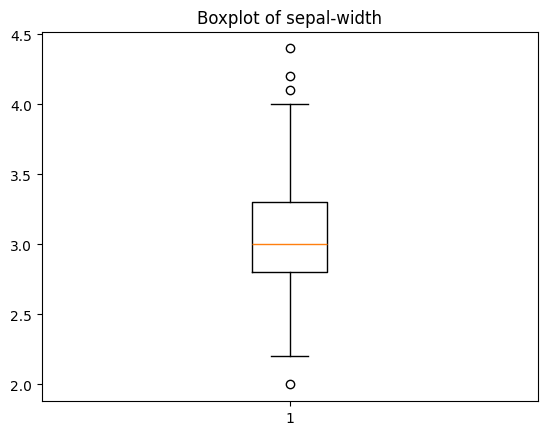

In [24]:
# YOUR CODE HERE
c1 = "sepal-width"
temp = df[df[c1] == 2.0]
print(temp.head())

q1 = df[c1].quantile(0.25)
q3 = df[c1].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
print("IQR:", iqr)
print("Lower bound for outliers:", lower_bound)

col = "sepal-width"
plt.boxplot(df[col])
plt.title(f"Boxplot of {col}")
plt.show()

YOUR ANSWERS HERE

Row 83 is an outlier in the dataset because the sepal-width value is 2.0. This is less than (1.5 * IQR) = 2.05 and therefore is an outlier.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE